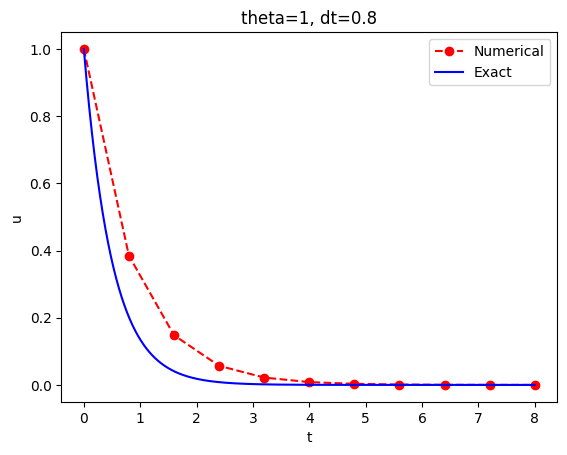

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import latexify


import numpy as np


@latexify.expression
def theta_formula(u_n: float, a: float, dt: float, theta: float):
    return ((1 - (1 - theta) * a * dt) / (1 + theta * a * dt)) * u_n

def solver(I: float, a: float, T: float, dt: float, theta: float):
    """Solve u'=-a*u, u(0)=I, for t in (0, T] with steps of dt."""
    dt = float(dt)  # Ensure dt is a float
    Nt = round(T / dt)  # Number of time steps
    T = Nt * dt  # Adjust T to fit the time step

    u = np.zeros(Nt + 1)  # Array for solution values
    t = np.linspace(0, T, Nt + 1)  # Time mesh

    u[0] = I  # Initial condition

    for n in range(Nt):  # Iterate from 0 to Nt-1
        u[n + 1] = theta_formula(u[n],a,dt,theta)

    return u, t


def u_exact(t: float, I: float, a: float) -> float:
    """Exact solution of u' = -a*u with initial condition u(0) = I."""
    return I * np.exp(-a * t)


def plot_numerical_and_exact(theta, I, a, T, dt):
    """Compare the numerical and exact solution in a plot."""
    
    u, t = solver(I=I, a=a, T=T, dt=dt, theta=theta)
 

    t_e = np.linspace(0, T, 1001)  # Fine mesh for exact solution
    u_e = u_exact(t_e, I, a)

    plt.plot(t, u, "r--o", label="Numerical")  # Red dashes with circles
    plt.plot(t_e, u_e, "b-", label="Exact")  # Blue line for exact solution

    plt.legend()
    plt.xlabel("t")
    plt.ylabel("u")
    plt.title(f"theta={theta:g}, dt={dt:g}")
    plt.savefig(f"plot_{theta}_{dt}.png")
    plt.show()


# Example call to function

plot_numerical_and_exact(I=1, a=2, T=8, dt=0.8, theta=1)







In [4]:
theta_formula #unfortunately not worked as per my expectation, why can't call from a function